In [1]:
import pandas as pd

df = pd.read_csv('my_project_1.tab', skiprows=13, header=None, delim_whitespace=True, names = ['rho','vp','vs'])

#rhos = df.rho.tolist()

In [2]:
import subprocess
def cut_value_from_line(lineno=5):
    output = subprocess.check_output("sed -n -e %sp *.tab" % lineno, shell=True)
    return float(str(output).strip("\\n'").strip("b'").strip())

p1=cut_value_from_line(5)
dp=cut_value_from_line(6)
np=int(cut_value_from_line(7))

t1=cut_value_from_line(9)
dt=cut_value_from_line(10)
nt=int(cut_value_from_line(11))


from numpy import arange
ps = arange(np)*dp + p1
ts = arange(nt)*dt + t1 - 273.15

In [3]:
from numpy import array, nan

rhos = array(df.rho.tolist()).reshape(nt,np)
vps = array(df.vp.tolist()).reshape(nt,np)
vss = array(df.vs.tolist()).reshape(nt,np)

rhos[rhos<10] = nan
vps[vps>20]   = nan
vss[vss>20]   = nan


/Users/mancinelli/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater
  
/Users/mancinelli/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


In [4]:
!head -n 20 *.tab

|6.6.6
my_project_1.tab                                                                                    
           2
P(bar)  
   10.000000000000000     
   501.63879598662209     
         300
T(K)    
   800.00000000000000     
   14.141414141414142     
         100
           3
rho,kg/m3      vp,km/s        vs,km/s       
  3218.27        6.99945        3.40149     
  3219.92        7.78033        4.49110     
  3221.41        7.78376        4.49276     
  3223.06        7.78971        4.49429     
  3224.70        7.79564        4.49583     
  3226.34        7.80154        4.49736     
  3227.97        7.80743        4.49889     


In [5]:
!ln -sf ../conversions .
from conversions import pressure
zs = pressure.PtoZ(ps*10e-5)

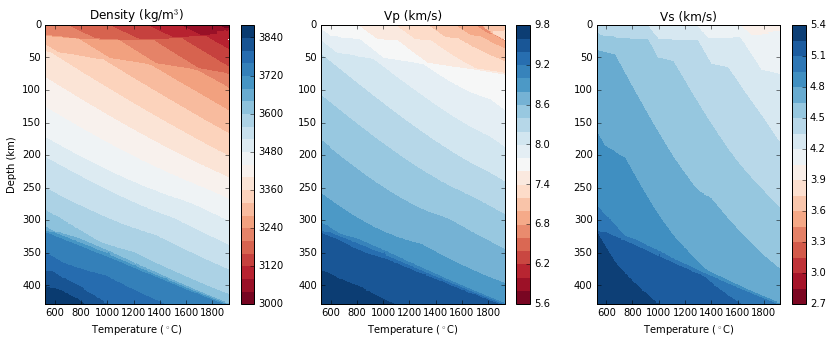

In [6]:
from matplotlib import pylab as plt
%matplotlib inline

plt.figure(1,(14,5))

#plt.imshow(rhos.T,vmin=3000,vmax=4000,origin='upper',cmap='RdBu_r', extent= [min(ps),t2,p1,p2],aspect='auto')

titles = ['Density (kg/m$^3$)','Vp (km/s)',"Vs (km/s)"]

for ii,array in enumerate([rhos, vps, vss]):
    _ = plt.figure(1)
    _ = plt.subplot(1,3,ii+1)
    _ = plt.contourf(ts,zs,array.T,25,cmap='RdBu')
    _ = plt.colorbar()
    plt.title(titles[ii])
    plt.ylim(max(zs),0)
    if ii == 0:
        _ = plt.ylabel('Depth (km)')
    _ = plt.xlabel('Temperature ($^\circ$C)')

In [7]:
from scipy.interpolate import interp2d

frho=interp2d(ts,zs,rhos.T / 1000.0)
fvp =interp2d(ts,zs,vps.T)
fvs =interp2d(ts,zs,vss.T)

In [8]:
import pickle
funs = [frho,fvp,fvs]
fout = open('funs.pickle','wb')
pickle.dump(funs, fout)
fout.close()
!ls -lth funs.pickle

-rw-r--r--  1 mancinelli  staff   1.4M Jun  6 11:34 funs.pickle
